In [1]:
from config import config
from src.trainer import Trainer
from src.data_process import load_train_dataframe

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
plt.style.use('fivethirtyeight')


cfg = config['train']

Finding parameters for each model
Iteration No: 1 started. Evaluating function at random point.

        'learning_rate': 0.29915825847072175,
        'max_depth': 28,
        'min_child_weight': 1.3248382568970998,
        'subsample': 0.9990884895579377,
        'colsample_bytree': 0.3124800792567785,
        'n_estimators': 457,
        'gamma': 0,
        'reg_lambda': 1,
        'reg_alpha': 1
         

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 7.6299
Function value obtained: 8.9971
Current minimum: 8.9971
Iteration No: 2 started. Evaluating function at random point.

        'learning_rate': 0.25404696408911914,
        'max_depth': 11,
        'min_child_weight': 5.269254187750071,
        'subsample': 0.4712802490905789,
        'colsample_bytree': 0.30661949235684305,
        'n_estimators': 581,
        'gamma': 1,
        'reg_lambda': 0,
        'reg_alpha': 0
         

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.0826
Fu

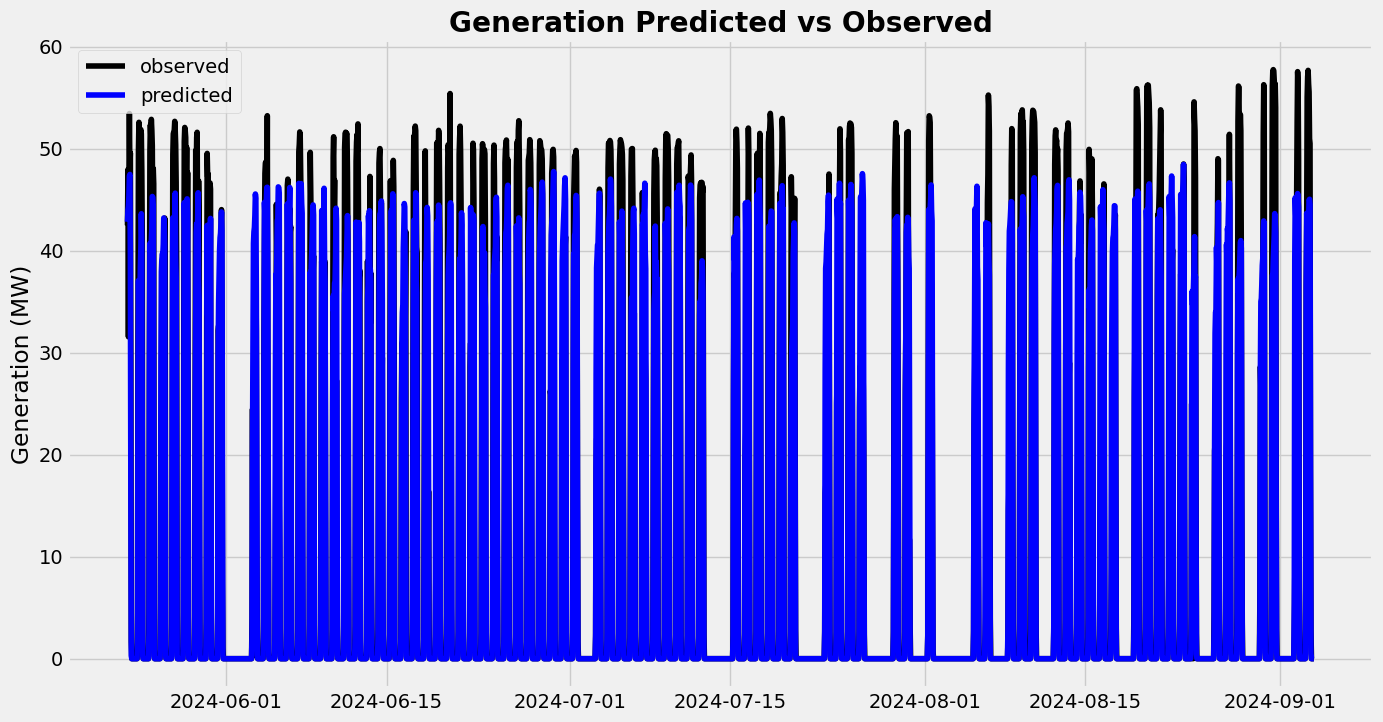

StackingRegressor(cv=5,
                  estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.704488687679921,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=np.int64(0), grow_policy=None,
                                            importance_type=None,
                                            interaction_con...
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=np.int64(471),
                                            n_jobs=None, num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('rf',
                               RandomForestRegressor(bootstrap=np.False_,
                                                     max_depth=np.int64(9),
                                                     max_features=0.5114843271882895,
                                                     min_samples_leaf=np.int64(9),
                                                     min_samples_split=np.int64(12),
                                                     n_estimators=np.int64(499)))],
                  final_estimator=RidgeCV(), n_jobs=-1)

In [2]:
data = load_train_dataframe()
trainer = Trainer(data)
trainer.train_stacked_model()

In [3]:
df = pd.concat([trainer.y_val, trainer.predicted], axis=1)
df.columns = ['generation','predicted']
df.head()

,generation,predicted
2024-05-23 09:00:00,42.486,42.826355
2024-05-23 10:00:00,47.951,43.998072
2024-05-23 11:00:00,31.550,44.328363
2024-05-23 12:00:00,46.913,45.353435
2024-05-23 13:00:00,53.435,47.302000


In [4]:
daily7 = df.resample('7D').mean().dropna()
print('MAPE%:', mean_absolute_percentage_error(daily7['generation'], daily7['predicted']))
print('MAE (MWh):', mean_absolute_error(daily7['generation'], daily7['predicted']))

MAPE%: 0.07060324673374206
MAE (MWh): 1.109162032844704


In [5]:
daily = df.resample('D').mean().dropna()
print('MAPE%:', mean_absolute_percentage_error(daily['generation'], daily['predicted']))
print('MAE (MWh):', mean_absolute_error(daily['generation'], daily['predicted']))

MAPE%: 0.17946052032557952
MAE (MWh): 2.672459156555004


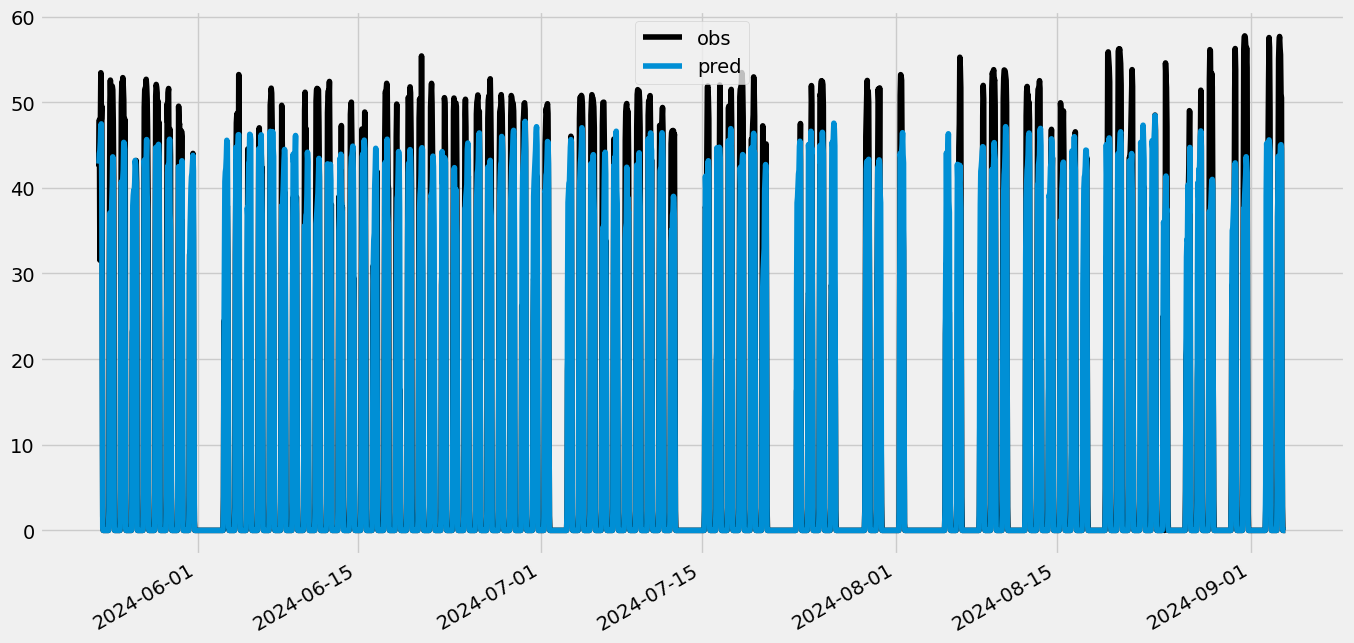

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
df['generation'].plot(ax=ax, label='obs', color='k')
df['predicted'].plot(ax=ax, label='pred')
plt.legend()
plt.show()


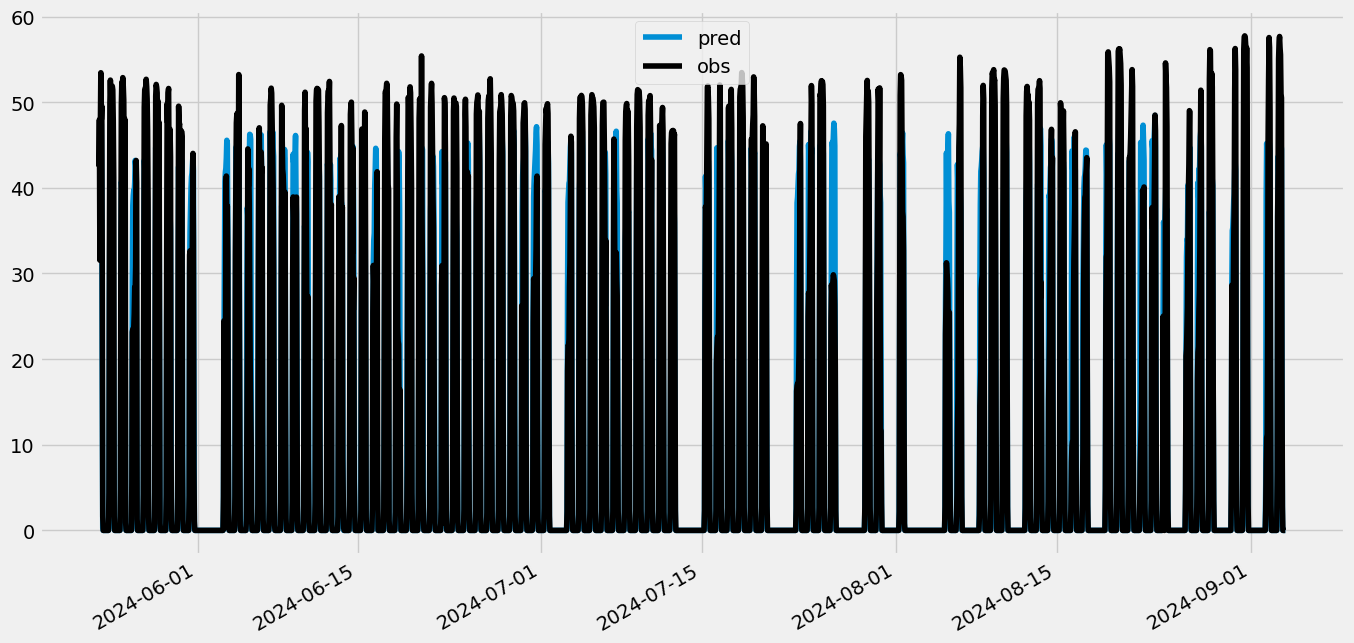

In [7]:
fig, ax = plt.subplots(figsize=(15,8))

df['predicted'].plot(ax=ax, label='pred')
df['generation'].plot(ax=ax, label='obs', color='k')

plt.legend()
plt.show()
